# Question 1

In [7]:
# Import libraries required to do operations like convolution, gaussian blur, sobel operator, pixel manipulation, etc.

import cv2
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

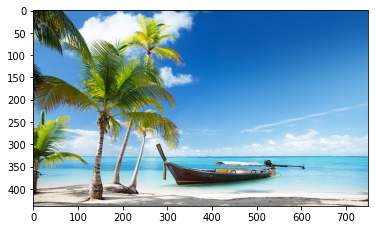

In [16]:
# Load image into variable and display it
beach = cv2.imread("images/beach.jpg")
beach = cv2.cvtColor(beach, cv2.COLOR_BGR2RGB)
plt.imshow(beach, cmap = plt.get_cmap('gray'))
plt.show()

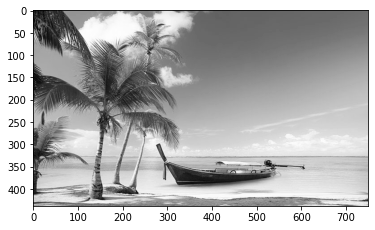

In [105]:
# Convert color image to grayscale to help extraction of edges and plot it
img = cv2.cvtColor(beach, cv2.COLOR_BGR2GRAY) 
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

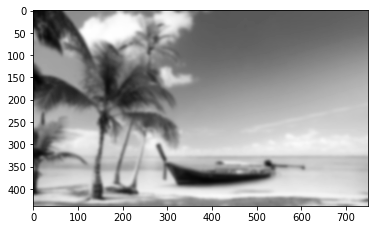

In [134]:
# Blur the grayscale image so that only important edges are extracted and the noisy ones ignored
# Noise reduction step 
img = cv2.GaussianBlur(img, (11, 11), 1.4) 
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()

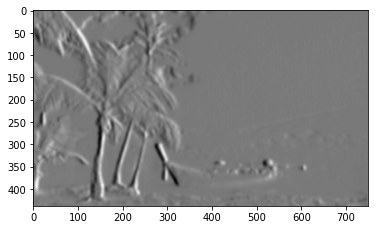

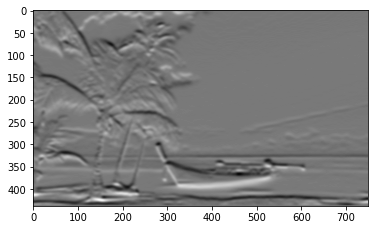

In [135]:
# Calculating the gradients 

# Apply Sobel Filter in X direction
gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
# Apply Sobel Filter in Y direction
gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 


plt.imshow(gx, cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(gy, cmap = plt.get_cmap('gray'))
plt.show()

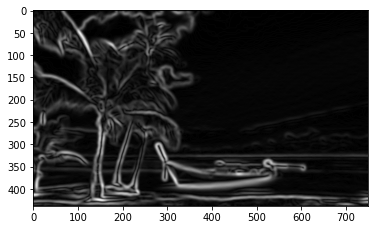

In [136]:
# Conversion of Cartesian coordinates to polar 

# Calculate the magnitude of the gradients obtained 
# Calculate direction of the gradients
mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 

plt.imshow(mag, cmap = plt.get_cmap('gray'))
plt.show()

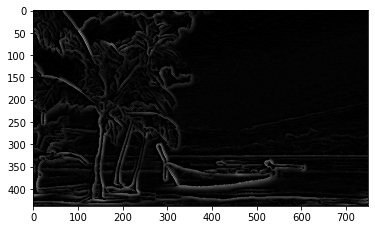

In [137]:
# setting the minimum and maximum thresholds  
# for double thresholding 
mag_max = np.max(mag) 
weak_th = mag_max * 0.1
strong_th = mag_max * 0.5

# getting the dimensions of the input image   
height, width = img.shape 

# Looping through every pixel of the grayscale  
# image 
for i_x in range(width): 
    for i_y in range(height): 

        grad_ang = ang[i_y, i_x] 
        grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 

        # selecting the neighbours of the target pixel 
        # according to the gradient direction 
        # In the x axis direction 
        if grad_ang<= 22.5: 
            neighb_1_x, neighb_1_y = i_x-1, i_y 
            neighb_2_x, neighb_2_y = i_x + 1, i_y 

        # top right (diagnol-1) direction 
        elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
            neighb_1_x, neighb_1_y = i_x-1, i_y-1
            neighb_2_x, neighb_2_y = i_x + 1, i_y + 1

        # In y-axis direction 
        elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
            neighb_1_x, neighb_1_y = i_x, i_y-1
            neighb_2_x, neighb_2_y = i_x, i_y + 1

        # top left (diagnol-2) direction 
        elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
            neighb_1_x, neighb_1_y = i_x-1, i_y + 1
            neighb_2_x, neighb_2_y = i_x + 1, i_y-1

        # Now it restarts the cycle 
        elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
            neighb_1_x, neighb_1_y = i_x-1, i_y 
            neighb_2_x, neighb_2_y = i_x + 1, i_y 

        # Non-maximum suppression step 
        if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
            if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
                mag[i_y, i_x]= 0
                continue

        if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
            if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
                mag[i_y, i_x]= 0

weak_ids = np.zeros_like(img) 
strong_ids = np.zeros_like(img)               
ids = np.zeros_like(img)
    

plt.imshow(mag, cmap = plt.get_cmap('gray'))
plt.show()

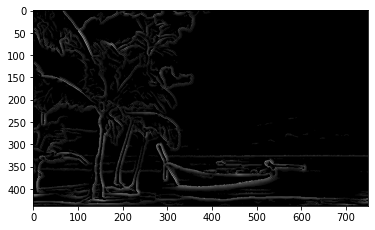

In [138]:
# double thresholding step 
for i_x in range(width): 
    for i_y in range(height): 

        grad_mag = mag[i_y, i_x] 

        if grad_mag<weak_th: 
            mag[i_y, i_x]= 0
        elif strong_th>grad_mag>= weak_th: 
            ids[i_y, i_x]= 1
        else: 
            ids[i_y, i_x]= 2


# finally returning the magnitude of 
# gradients of edges 
plt.imshow(mag, cmap = plt.get_cmap('gray'))
plt.show()

# Canny Edge OpenCV

<p>Just to test the results, here inbuilt canny edge detection has been used</p>

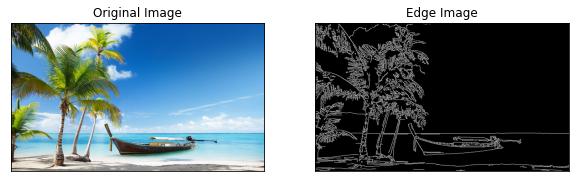

In [139]:
beach = cv2.imread("images/beach.jpg")
beach = cv2.cvtColor(beach, cv2.COLOR_BGR2RGB)

edges = cv2.Canny(beach,200,500)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(beach,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Question 2
https://github.com/ShubhamKhurana63/Hough-Transform-Implementation/blob/master/task3.py

# Step 1
Open and Plot the input image

image shape:  (486, 863, 3)


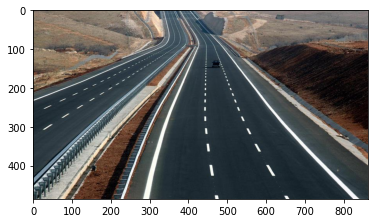

In [156]:
from scipy import misc

import matplotlib.pyplot as plt
import numpy as np
import math

import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage

img = cv2.imread("images/highway1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('image shape: ', beach.shape)

plt.imshow(img)
plt.show()

# Step 2 : Hough Space

Calculate the Hough space for a range of r and theta

In [ ]:
img_shape = img.shape

x_max = img_shape[0]
y_max = img_shape[1]

theta_max = 1.0 * math.pi 
theta_min = 0.0

r_min = 0.0
r_max = math.hypot(x_max, y_max)

r_dim = 200 
theta_dim = 300

hough_space = np.zeros((r_dim,theta_dim))

for x in range(x_max):
    for y in range(y_max):
        if img[x,y,0] == 255: continue
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = r_dim * ( 1.0 * r ) / r_max
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

plt.imshow(hough_space, origin='lower')
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,40)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,40)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'Theta')
plt.ylabel(r'r')
plt.title('Hough Space')

plt.savefig("hough_space_r_theta.png",bbox_inches='tight')

plt.close()

# Step 3 : Find the maximums

After calculating the Hough space, the next step is to find the local extrema. There are several approaches to do that (deterministic or stochastic), here a simple deterministic has been used

In [ ]:
neighborhood_size = 20
threshold = 140

data_max = filters.maximum_filter(hough_space, neighborhood_size)
maxima = (hough_space == data_max)

data_min = filters.minimum_filter(hough_space, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
slices = ndimage.find_objects(labeled)

x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2    
    y.append(y_center)

print x
print y

plt.imshow(hough_space, origin='lower')
plt.savefig('hough_space_i_j.png', bbox_inches = 'tight')

plt.autoscale(False)
plt.plot(x,y, 'ro')
plt.savefig('hough_space_maximas.png', bbox_inches = 'tight')

plt.close()

# Step 4: Plot straight lines

Let's plot the straight lines associated to the first 5 local extrema in the original image:

In [ ]:
line_index = 1

for i,j in zip(y, x):

    r = round( (1.0 * i * r_max ) / r_dim,1)
    theta = round( (1.0 * j * theta_max) / theta_dim,1)

    fig, ax = plt.subplots()

    ax.imshow(img)

    ax.autoscale(False)

    px = []
    py = []
    for i in range(-y_max-40,y_max+40,1):
        px.append( math.cos(-theta) * i - math.sin(-theta) * r ) 
        py.append( math.sin(-theta) * i + math.cos(-theta) * r )

    ax.plot(px,py, linewidth=10)

    plt.savefig("image_line_"+ "%02d" % line_index +".png",bbox_inches='tight')

    #plt.show()

    plt.close()

    line_index = line_index + 1

In [4]:
import numpy as np
import imageio
import math

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)


def hough_line(img, angle_step=1, lines_are_white=True, value_threshold=5):
    """
    Hough transform for lines
    Input:
    img - 2D binary image with nonzeros representing edges
    angle_step - Spacing between angles to use every n-th angle
                 between -90 and 90 degrees. Default step is 1.
    lines_are_white - boolean indicating whether lines to be detected are white
    value_threshold - Pixel values above or below the value_threshold are edges
    Returns:
    accumulator - 2D array of the hough transform accumulator
    theta - array of angles used in computation, in radians.
    rhos - array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    # (row, col) indexes to edges
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    y_idxs, x_idxs = np.nonzero(are_edges)

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos


def show_hough_line(img, accumulator, thetas, rhos, save_path=None):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    # plt.axis('off')
#     if save_path is not None:
#         plt.savefig(save_path, bbox_inches='tight')
    plt.show()


# if __name__ == '__main__':
imgpath = 'images/highway1.jpg'
img = imageio.imread(imgpath)
if img.ndim == 3:
    img = rgb2gray(img)
accumulator, thetas, rhos = hough_line(img)
show_hough_line(img, accumulator, save_path='imgs/output.png')

TypeError: show_hough_line() missing 2 required positional arguments: 'thetas' and 'rhos'

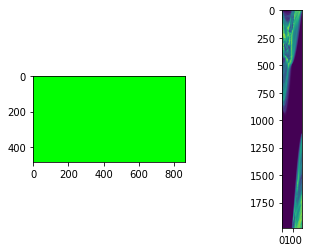

In [3]:
"""-------------------------------
Implement Hough Line Transform
-------------------------------"""

from matplotlib import pyplot as plt
import numpy as np
import argparse
import math
import cv2

# ------------------ Do Hough Line Transform ------------------ #
def hough_line(edge):
    # Theta 0 - 180 degree
    # Calculate 'cos' and 'sin' value ahead to improve running time
    theta = np.arange(0, 180, 1)
    cos = np.cos(np.deg2rad(theta))
    sin = np.sin(np.deg2rad(theta))

    # Generate a accumulator matrix to store the values
    rho_range = round(math.sqrt(edge.shape[0]**2 + edge.shape[1]**2))
    accumulator = np.zeros((2 * rho_range, len(theta)), dtype=np.uint8)

    # Threshold to get edges pixel location (x,y)
    edge_pixels = np.where(edge == 255)
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))

    # Calculate rho value for each edge location (x,y) with all the theta range
    for p in range(len(coordinates)):
        for t in range(len(theta)):
            rho = int(round(coordinates[p][1] * cos[t] + coordinates[p][0] * sin[t]))
            accumulator[rho, t] += 2 # Suppose add 1 only, Just want to get clear result

    return accumulator

# -------------------------- main -------------------------- #
if __name__ == '__main__':

    # read image then convert to grayscale and find the edges by Canny Edge Detection
    image = cv2.imread('images/highway1.jpg')
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(grayscale,50,150)

    # Function to do hough line transform
    accumulator = hough_line(edges)

    # Threshold some high values then draw the line
    edge_pixels = np.where(accumulator > 110)
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))

    # Use line equation to draw detected line on an original image
    for i in range(0, len(coordinates)):
        a = np.cos(np.deg2rad(coordinates[i][1]))
        b = np.sin(np.deg2rad(coordinates[i][1]))
        x0 = a*coordinates[i][0]
        y0 = b*coordinates[i][0]
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),1)

    # show result
    plt.subplot(121), plt.imshow(image)
    plt.subplot(122), plt.imshow(accumulator)
    plt.show()

# Question 3

750


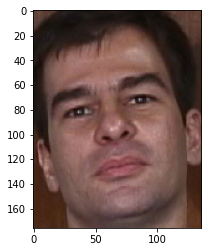

In [13]:
import cv2
import matplotlib.pyplot as plt
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = plt.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

folder="cropped_faces"

images = load_images_from_folder(folder)
print(len(images))

plt.imshow(images[1], cmap='gray')
plt.show()

In [43]:
train_img = np.array(images[:int(len(images)/2)])
test_img = np.array(images[int(len(images)/2):])

print(len(train_img), len(test_img))

375 375


In [44]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

kp_train = []
des_train = []

kp_test = []
des_test = []
# find the keypoints and descriptors with SIFT
for img in train_img:
    kp, des = sift.detectAndCompute(img,None)
    kp_train.append(kp), des_train.append(des)
    
for img in test_img:
    kp, des = sift.detectAndCompute(img,None)
    kp_test.append(kp), des_test.append(des)

In [46]:
print(test_img[0].shape)
print(des_test[0].shape)

(201, 156, 3)
(150, 128)


In [121]:
# BFMatcher with default params
bf = cv2.BFMatcher()
train_match_dict = dict.fromkeys(range(len(train_img)), [])
# print(train_match_dict)
for i in range(len(train_img)):
    train_match_dict[i] = []
    for j in range(len(train_img)):
        matches = bf.knnMatch(des_train[i],des_test[j],k=2)
        
        good = []
        for m,n in matches:
            if m.distance < 0.8*n.distance:
                good.append([m])
        
        if len(good) >= 30:
            train_match_dict[i].append(j)
        
        

In [156]:
# train_match_dict

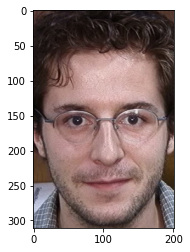

In [123]:
plt.imshow(train_img[105])

(60,)
1181.0
10


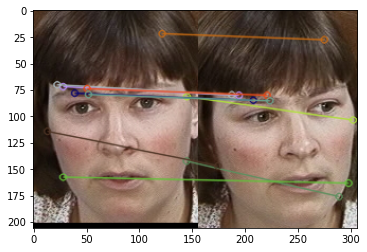

(<matplotlib.image.AxesImage at 0x25467540250>, None)

In [125]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_test[0],des_test[2],k=3)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(des_test[0],des_test[2])

print(np.array(matches).shape)
# # Apply ratio test
# good = []
# for m,n in matches:
#     if m.distance < 0.75*n.distance:
#         good.append([m])
        
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
good = matches[:10]
print(matches[10].distance)
print(len(good))
# cv.drawMatchesKnn expects list of lists as matches.
# img3 = cv2.drawMatchesKnn(test_img[0],kp_test[0],test_img[2],kp_test[2],good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img3 = cv2.drawMatches(test_img[0],kp_test[0],test_img[2],kp_test[2],good, None, flags=2)
plt.imshow(img3),plt.show()

# Question 4

In [16]:
import cv2 
import numpy as np 


def harris_points(img_path):
    image = cv2.imread(img_path) 

    operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    operatedImage = np.float32(operatedImage) 
    dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 


    coordinates_img1 = np.array(dest > 0.01 * dest.max())
    x, y = np.where(coordinates_img1 == True)

    dest = cv2.dilate(dest, None) 
    image[dest > 0.01 * dest.max()]=[0, 0, 255] 

    operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    plt.imshow(operatedImage, cmap='gray') 
    plt.show()
    print(len(x), len(y))
    return (x,y)

def SIFT_points(img_path):
    image = cv2.imread(img_path)
#     operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
#     operatedImage = np.float32(operatedImage) 
    
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(image,None)
    
    img = cv2.drawKeypoints(image, kp, None)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(img, cmap='gray') 
    plt.show()
    
    print(np.array(kp).shape, np.array(des).shape)
    return kp, des

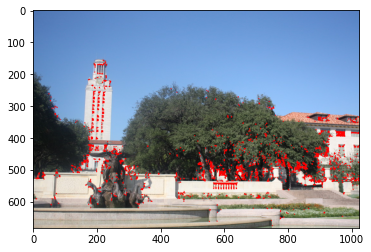

5027 5027


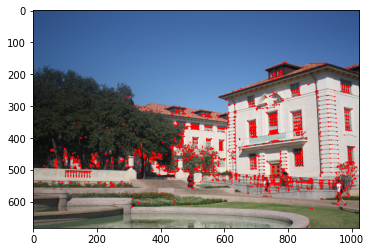

8407 8407


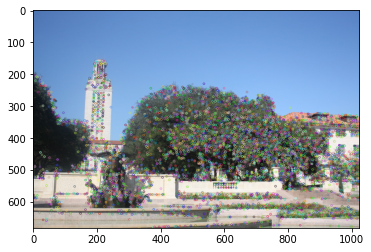

(5314,) (5314, 128)


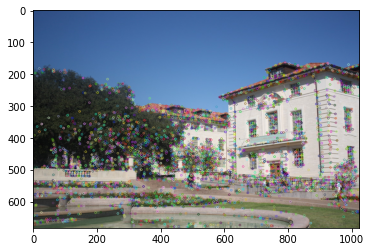

(4195,) (4195, 128)


In [17]:
hp_left = harris_points('images/uttower_left.jpg')
hp_right = harris_points('images/uttower_right.jpg')

kp_left, des_left = SIFT_points('images/uttower_left.jpg')
kp_right, des_right = SIFT_points('images/uttower_right.jpg')

In [22]:
common = []
for i in range(len(des_left)):
    for j in range(len(des_right)):
        euclideanDist = np.sqrt(sum((des_left[i] - des_right[j])**2))
#         print(euclideanDist)
        if euclideanDist <= 300:
            common.append((i, j))
#     break
print(common)

KeyboardInterrupt: 

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import random

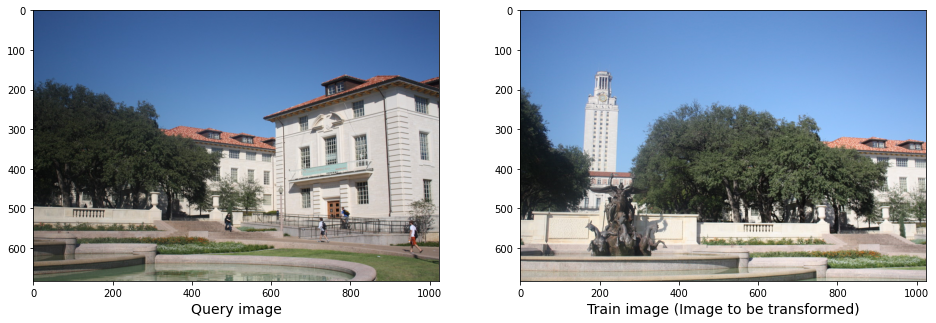

In [9]:
img1 = imageio.imread('images/uttower_right.jpg')
trainImg_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

img2 = imageio.imread('images/uttower_left.jpg')
queryImg_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(img1, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(img2, cmap="gray")
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

plt.show()

In [10]:
def detectAndDescribe(image):
    descriptor = cv2.SIFT_create()
    (kps, features) = descriptor.detectAndCompute(image, None)
    return (kps, features)

kp1, desc1 = detectAndDescribe(img1)
kp2, desc2 = detectAndDescribe(img2)

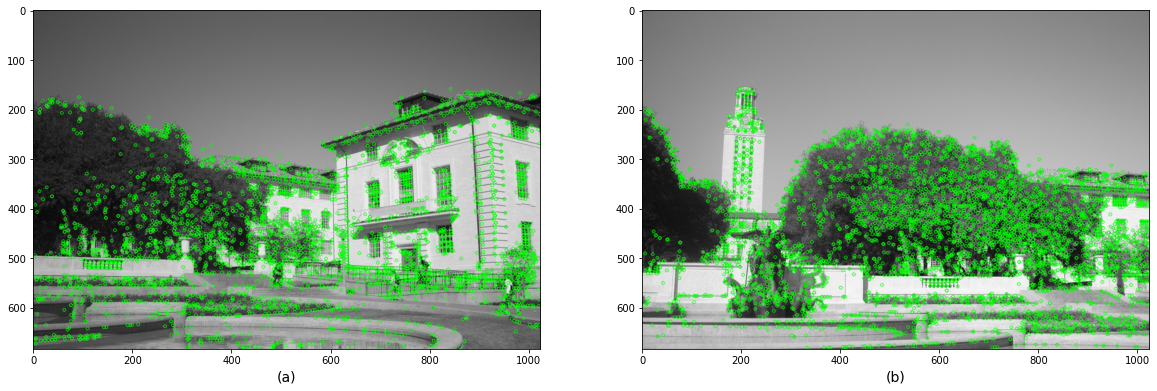

Found keypoints in right: 4280
Found keypoints in left: 5346


In [11]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kp1,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(queryImg_gray,kp2,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

plt.show()

print("Found keypoints in " + 'right' + ": " + str(len(kp1)))
print("Found keypoints in " + 'left' + ": " + str(len(kp2)))

Matching Features...


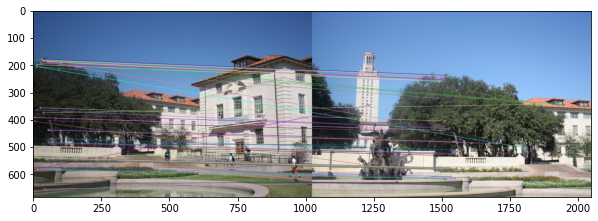

Number of matched Points :  1818


In [12]:
def matchFeatures(kp1, kp2, desc1, desc2, img1, img2):
    print("Matching Features...")
    matcher = cv2.BFMatcher(cv2.NORM_L2, True)
    matches = matcher.match(desc1, desc2)
    matchImg = cv2.drawMatches(img1,kp1,img2,kp2,matches[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(10,10))
    plt.imshow(matchImg)
    plt.show()
    
    print('Number of matched Points : ', len(matches))
    return matches

keypoints = [kp1,kp2]
matches = matchFeatures(kp1, kp2, desc1, desc2, img1, img2)

In [13]:
correspondenceList = []
for match in matches:
        (x1, y1) = keypoints[0][match.queryIdx].pt
        (x2, y2) = keypoints[1][match.trainIdx].pt
        correspondenceList.append([x1, y1, x2, y2])
        
corrs = np.matrix(correspondenceList)
print(corrs.shape)
print(corrs)

(1818, 4)
[[   4.35508156  391.92498779  470.79470825  439.13067627]
 [   8.05209446  406.63775635  289.62237549  577.12225342]
 [   9.41284084  581.62542725  486.83786011  617.13635254]
 ...
 [1010.71704102  636.83752441  600.83355713  303.14660645]
 [1013.47943115  506.70605469  181.77833557  440.51235962]
 [1017.83435059  519.29614258  199.12802124  401.368927  ]]


In [32]:
#
# Computers a homography from 4-correspondences
#
def calculateHomography(correspondences):
    #loop through correspondences and create assemble matrix
    aList = []
    for corr in correspondences:
        p1 = np.matrix([corr.item(0), corr.item(1), 1])
        p2 = np.matrix([corr.item(2), corr.item(3), 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        aList.append(a1)
        aList.append(a2)
    matrixA = np.matrix(aList)

    #svd composition
    u, s, v = np.linalg.svd(matrixA)

    #reshape the min singular value into a 3 by 3 matrix
    h = np.reshape(v[8], (3, 3))

    #normalize and now we have h
    h = (1/h.item(8)) * h
    return h

def calculateAffine(correspondences):
    corrs = np.array(correspondences)
    x = np.transpose(np.matrix([corrs[0][:2],corrs[1][:2],corrs[2][:2],corrs[3][:2]]))
    y = np.transpose(np.matrix([corrs[0][2:],corrs[1][2:],corrs[2][2:],corrs[3][2:]]))
    # add ones on the bottom of x and y
    x = np.vstack((x,[1,1,1,1]))
    y = np.vstack((y,[1,1,1,1]))
    # solve for A2
    A2 = y * x.I
    # return function that takes input x and transforms it
    # don't need to return the 4th row as it is 
#     print(A2)
#     return lambda x: (A2*np.vstack((np.matrix(x).reshape(3,1),1)))[0:3,:]
    return A2

#
#Calculate the geometric distance between estimated points and original points
#
def geometricDistance(correspondence, h):

    p1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    estimatep2 = np.dot(h, p1)
    estimatep2 = (1/estimatep2.item(2))*estimatep2

    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)


def ransac(corr, thresh):
    maxInliers = []
    finalH = None
    for i in range(1000):
        #find 4 random points to calculate a homography
        corr1 = corr[random.randrange(0, len(corr))]
        corr2 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((corr1, corr2))
        corr3 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr3))
        corr4 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr4))
        
        #call the homography function on those points
        h = calculateAffine(randomFour)
#         h = calculateHomography(randomFour)
#         print(h)
#         break;
        inliers = []

        for i in range(len(corr)):
            d = geometricDistance(corr[i], h)
            if d < 5:
                inliers.append(corr[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
        print("Corr size: ", len(corr), " NumInliers: ", len(inliers), "Max inliers: ", len(maxInliers))

        if len(maxInliers) > (len(corr)*thresh):
            break
    return finalH, maxInliers

finalH, inliers = ransac(corrs, 0.6)
print("Final homography: ", finalH)
print("Final inliers count: ", len(inliers))

Corr size:  1818  NumInliers:  2 Max inliers:  2
Corr size:  1818  NumInliers:  0 Max inliers:  2
Corr size:  1818  NumInliers:  0 Max inliers:  2
Corr size:  1818  NumInliers:  6 Max inliers:  6
Corr size:  1818  NumInliers:  1 Max inliers:  6
Corr size:  1818  NumInliers:  13 Max inliers:  13
Corr size:  1818  NumInliers:  241 Max inliers:  241
Corr size:  1818  NumInliers:  0 Max inliers:  241
Corr size:  1818  NumInliers:  0 Max inliers:  241
Corr size:  1818  NumInliers:  5 Max inliers:  241
Corr size:  1818  NumInliers:  0 Max inliers:  241
Corr size:  1818  NumInliers:  5 Max inliers:  241
Corr size:  1818  NumInliers:  0 Max inliers:  241
Corr size:  1818  NumInliers:  554 Max inliers:  554
Corr size:  1818  NumInliers:  18 Max inliers:  554
Corr size:  1818  NumInliers:  0 Max inliers:  554
Corr size:  1818  NumInliers:  0 Max inliers:  554
Corr size:  1818  NumInliers:  0 Max inliers:  554
Corr size:  1818  NumInliers:  0 Max inliers:  554
Corr size:  1818  NumInliers:  1 Max

Corr size:  1818  NumInliers:  3 Max inliers:  736
Corr size:  1818  NumInliers:  6 Max inliers:  736
Corr size:  1818  NumInliers:  36 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  25 Max inliers:  736
Corr size:  1818  NumInliers:  114 Max inliers:  736
Corr size:  1818  NumInliers:  2 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  228 Max inliers:  736
Corr size:  1818  NumInliers:  488 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  9 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  630 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  646 Max inliers:  736
Corr size:  1818  N

Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  28 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  2 Max inliers:  736
Corr size:  1818  NumInliers:  615 Max inliers:  736
Corr size:  1818  NumInliers:  9 Max inliers:  736
Corr size:  1818  NumInliers:  11 Max inliers:  736
Corr size:  1818  NumInliers:  24 Max inliers:  736
Corr size:  1818  NumInliers:  9 Max inliers:  736
Corr size:  1818  NumInliers:  11 Max inliers:  736
Corr size:  1818  NumInliers:  4 Max inliers:  736
Corr size:  1818  NumInliers:  4 Max inliers:  736
Corr size:  1818  NumInliers:  13 Max inliers:  736
Corr size:  1818  NumInliers:  408 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  6 Max inliers:  736
Corr size:  1818  NumI

Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  17 Max inliers:  736
Corr size:  1818  NumInliers:  626 Max inliers:  736
Corr size:  1818  NumInliers:  349 Max inliers:  736
Corr size:  1818  NumInliers:  31 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  8 Max inliers:  736
Corr size:  1818  NumInliers:  5 Max inliers:  736
Corr size:  1818  NumInliers:  16 Max inliers:  736
Corr size:  1818  NumInliers:  2 Max inliers:  736
Corr size:  1818  NumInliers:  23 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  687 Max inliers:  736
Corr size:  1818  NumInliers:  563 Max inliers:  736
Corr size:  1818  NumInliers:  2 Max inliers:  736
Corr size:  1818  NumInliers:  411 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  3 Max inliers:  736
Corr size:  1818 

Corr size:  1818  NumInliers:  334 Max inliers:  736
Corr size:  1818  NumInliers:  2 Max inliers:  736
Corr size:  1818  NumInliers:  15 Max inliers:  736
Corr size:  1818  NumInliers:  4 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  401 Max inliers:  736
Corr size:  1818  NumInliers:  24 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  12 Max inliers:  736
Corr size:  1818  NumInliers:  14 Max inliers:  736
Corr size:  1818  NumInliers:  2 Max inliers:  736
Corr size:  1818  NumInliers:  25 Max inliers:  736
Corr size:  1818  NumInliers:  16 Max inliers:  736
Corr size:  1818  NumInliers:  30 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  462 Max inliers:  736
Corr size:  1818  

Corr size:  1818  NumInliers:  18 Max inliers:  736
Corr size:  1818  NumInliers:  52 Max inliers:  736
Corr size:  1818  NumInliers:  33 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  8 Max inliers:  736
Corr size:  1818  NumInliers:  13 Max inliers:  736
Corr size:  1818  NumInliers:  1 Max inliers:  736
Corr size:  1818  NumInliers:  655 Max inliers:  736
Corr size:  1818  NumInliers:  22 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  12 Max inliers:  736
Corr size:  1818  NumInliers:  36 Max inliers:  736
Corr size:  1818  NumInliers:  5 Max inliers:  736
Corr size:  1818  NumInliers:  0 Max inliers:  736
Corr size:  1818  NumInliers:  25 Max inliers:  736
Corr size:  1818  NumInliers:  7 Max inliers:  736
Corr size:  1818  NumInliers:  21 Max inliers:  736
Corr size:  1818  NumInliers:  9 Max inliers:  736
Corr size:  1818  NumInliers:  16 Max inliers:  736
Corr size:  1818  N

Corr size:  1818  NumInliers:  0 Max inliers:  751
Corr size:  1818  NumInliers:  13 Max inliers:  751
Corr size:  1818  NumInliers:  0 Max inliers:  751
Corr size:  1818  NumInliers:  18 Max inliers:  751
Corr size:  1818  NumInliers:  2 Max inliers:  751
Corr size:  1818  NumInliers:  6 Max inliers:  751
Corr size:  1818  NumInliers:  220 Max inliers:  751
Corr size:  1818  NumInliers:  14 Max inliers:  751
Corr size:  1818  NumInliers:  1 Max inliers:  751
Corr size:  1818  NumInliers:  0 Max inliers:  751
Corr size:  1818  NumInliers:  2 Max inliers:  751
Corr size:  1818  NumInliers:  6 Max inliers:  751
Corr size:  1818  NumInliers:  15 Max inliers:  751
Corr size:  1818  NumInliers:  0 Max inliers:  751
Corr size:  1818  NumInliers:  13 Max inliers:  751
Corr size:  1818  NumInliers:  22 Max inliers:  751
Corr size:  1818  NumInliers:  6 Max inliers:  751
Corr size:  1818  NumInliers:  17 Max inliers:  751
Corr size:  1818  NumInliers:  385 Max inliers:  751
Corr size:  1818  Nu

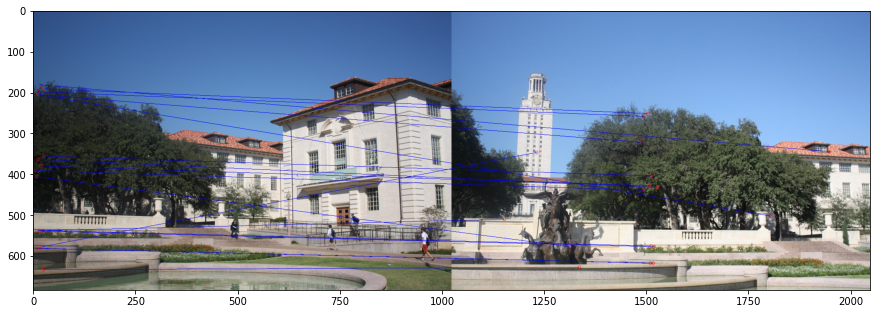

In [33]:
# This draws matches and optionally a set of inliers in a different color
# Note: I lifted this drawing portion from stackoverflow and adjusted it to my needs because OpenCV 2.4.11 does not
# include the drawMatches function
def drawMatches(img1, kp1, img2, kp2, matches, inliers = None):
    # Create a new output image that concatenates the two images together
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1,:] = np.dstack([img1[:,:,0], img1[:,:,1], img1[:,:,2]])
#     out[:rows1,:cols1,:] = img1

    # Place the next image to the right of it
    out[:rows2,cols1:cols1+cols2,:] = np.dstack([img2[:,:,0], img2[:,:,1], img2[:,:,2]])
#     out[:rows2,cols1:cols1+cols2,:] = img2

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns, y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        inlier = False

        if inliers is not None:
            for i in inliers:
                if i.item(0) == x1 and i.item(1) == y1 and i.item(2) == x2 and i.item(3) == y2:
                    inlier = True

        # Draw a small circle at both co-ordinates
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points, draw inliers if we have them
        if inliers is not None and inlier:
            cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (0, 255, 0), 1)
        elif inliers is not None:
            cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (0, 0, 255), 1)

        if inliers is None:
            cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255, 0, 0), 1)

    return out


matchImg = drawMatches(img1,kp1,img2,kp2,matches[:20],inliers)
plt.figure(figsize=(15,15))
plt.imshow(matchImg)
plt.show()

[[ 8.21504326e-01  1.30956103e-01  4.22113986e+02]
 [-1.32766492e-01  1.01215474e+00  5.29641697e+01]
 [-2.07567091e-04  6.93098453e-05  1.00000000e+00]]


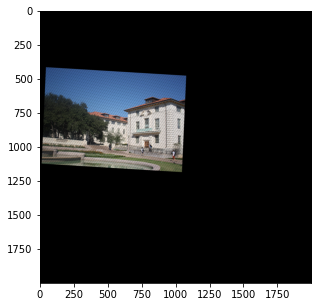

In [34]:
H = np.matrix([[ 8.21504326e-01 ,1.30956103e-01  ,4.22113986e+02],
              [-1.32766492e-01  ,1.01215474e+00  ,5.29641697e+01],
              [-2.07567091e-04  ,6.93098453e-05  ,1.00000000e+00]])

print(H)
img_transformed = np.empty((2000, 2000, 3), dtype=np.uint8)
for i, row in enumerate(img1):
    for j, col in enumerate(row):
        pixel_data = img1[i, j, :]
        input_coords = np.array([i, j, 1])
        
        temp = np.array(finalH @ input_coords)
#         i_out, j_out, _ = finalH @ input_coords
        img_transformed[int(temp[0][0]), int(temp[0][1]), :] = pixel_data

plt.figure(figsize=(5, 5))
plt.imshow(img_transformed)

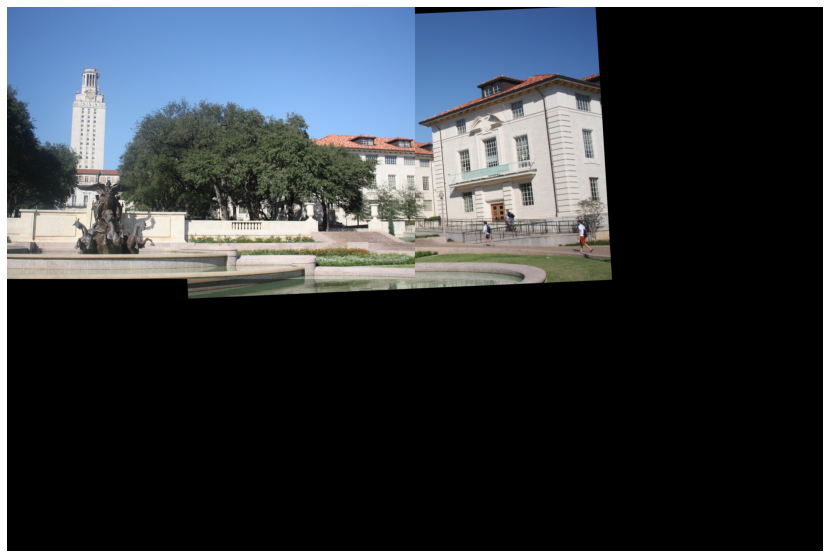

NameError: name 'queryImg' is not defined

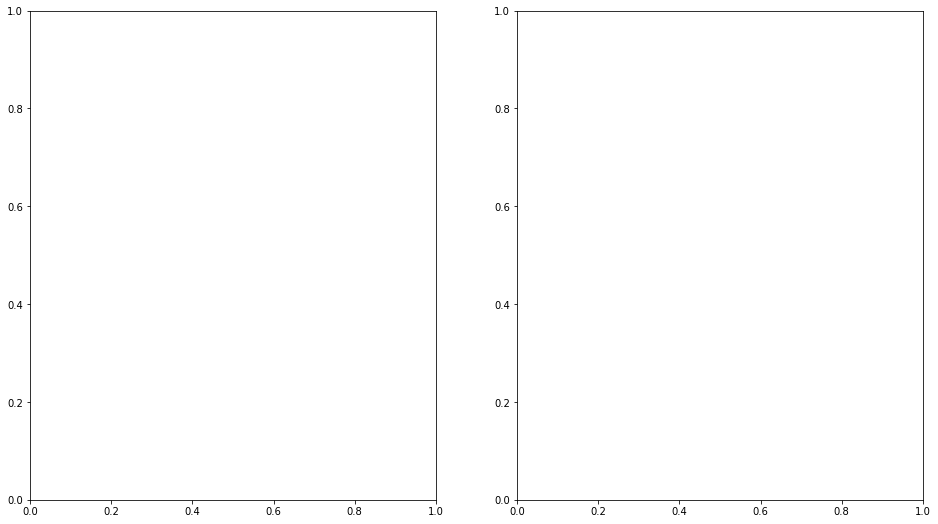

In [35]:
# Apply panorama correction
width = img1.shape[1] + img2.shape[1]
height = img1.shape[0] + img2.shape[0]

result = cv2.warpPerspective(img1, finalH, (width, height))
result[0:img2.shape[0], 0:img2.shape[1]] = img2

plt.figure(figsize=(20,10))
plt.imshow(result)

plt.axis('off')
plt.show()


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(queryImg, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(trainImg, cmap="gray")
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

In [ ]:
https://colab.research.google.com/drive/11Md7HWh2ZV6_g3iCYSUw76VNr4HzxcX5?source=post_page---------------------------#scrollTo=__75LyOoE9gl
    
https://github.com/hughesj919/HomographyEstimation/blob/master/Homography.py